In [126]:
'''
Qasim Bhutta & Camden Alpert 
Assignment 1
Anurag Nagar
CS 4375
'''

# Import necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from ucimlrepo import fetch_ucirepo 

# Fetch dataset 
bike_sharing = fetch_ucirepo(id=275)


# Initialize LabelEncoder
le = LabelEncoder()

# Initialize Standard Scaler
scaler = StandardScaler()
  
# Data (as pandas dataframes);
features_df = bike_sharing.data.features
targets_df = bike_sharing.data.targets

# Combined DataFrame (features + target)
df = pd.concat([features_df, targets_df], axis=1)

### Data PreProcessing ###
#Drops duplicate rows from all data DF
df.drop_duplicates(inplace=True)

# Drops NaN from all data DF
df.dropna(axis=1, inplace=True)



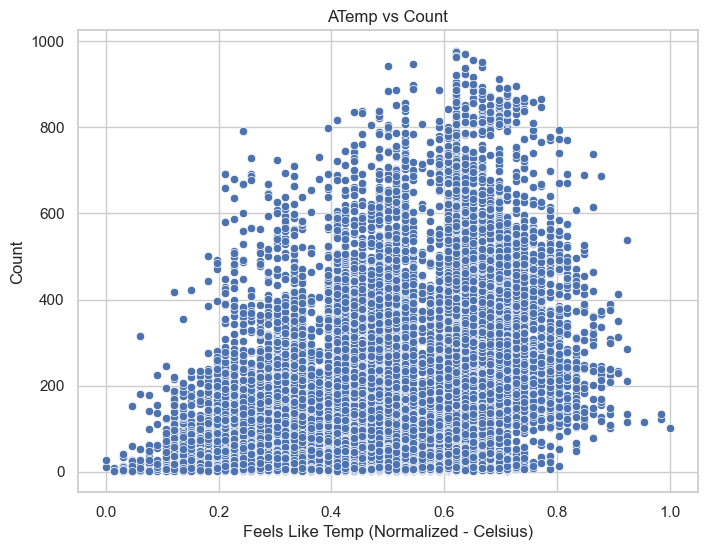

In [127]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['hum'], y=df['cnt'])
plt.xlabel('Humidity (normalized)')
plt.ylabel('Count')
plt.title('Humidity vs Count')
plt.show()

In [128]:

# Identifies categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Identifies numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Scales numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])



# Assigns features_df to encoded and scaled features data
features_df = df.drop(columns=['cnt', 'dteday'])

# Assigns features_df to encoded target
targets_df = df['cnt']

# Print correlation to see which features to include/remove for learning
print(df.corr())

# Which features to include in learning
features_df = df[["season", "yr", "mnth", "hr", "temp", "atemp", "hum"]]

# 90/10 split
x_train, x_test, y_train, y_test = train_test_split(features_df, targets_df, test_size=0.1, random_state=10)

# Train Model. SGDRegressor uses Stochastic Gradient Descent method
model = SGDRegressor(max_iter=1, tol=1e-3, learning_rate='adaptive', eta0=0.001, random_state=10)
n_iterations = 1000
mse_per_iteration = []
rs_per_iteration = []
for i in range(n_iterations):
    model.partial_fit(x_train, y_train)
    y_pred = model.predict(x_test)
    rs = r2_score(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    mse_per_iteration.append(mse)
    rs_per_iteration.append(rs)

model.coef_
# model.fit(x_train, y_train)

### Evaluation ###
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'Learned Coefficients: {model.coef_}')

print(f'R-squared (Train): {r2_train}')
print(f'R-squared (Test): {r2_test}')

print(f'MSE (Train): {mse_train}')
print(f'MSE (Test): {mse_test}')

              dteday    season        yr      mnth        hr   holiday  \
dteday      1.000000  0.404452  0.865648  0.489808 -0.006161  0.014737   
season      0.404452  1.000000 -0.010742  0.830386 -0.006117 -0.009585   
yr          0.865648 -0.010742  1.000000 -0.010473 -0.003867  0.006692   
mnth        0.489808  0.830386 -0.010473  1.000000 -0.005772  0.018430   
hr         -0.006161 -0.006117 -0.003867 -0.005772  1.000000  0.000479   
holiday     0.014737 -0.009585  0.006692  0.018430  0.000479  1.000000   
weekday     0.001372 -0.002335 -0.004485  0.010400 -0.003498 -0.102088   
workingday -0.003366  0.013743 -0.002196 -0.003477  0.002285 -0.252471   
weathersit -0.014063 -0.014524 -0.019157  0.005400 -0.020203 -0.017036   
temp        0.136074  0.312025  0.040913  0.201691  0.137603 -0.027340   
atemp       0.137543  0.319380  0.039222  0.208096  0.133750 -0.030973   
hum         0.010196  0.150625 -0.083546  0.164411 -0.276498 -0.010588   
windspeed  -0.074645 -0.149773 -0.0087

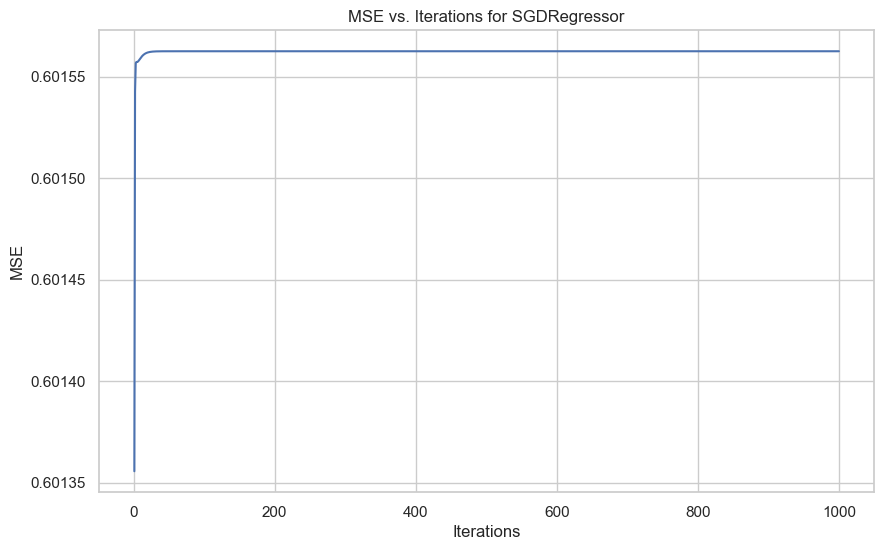

In [129]:
# Plotting MSE vs. Iterations
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=np.arange(1, n_iterations+1), y=mse_per_iteration)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("MSE vs. Iterations for SGDRegressor")
plt.show()

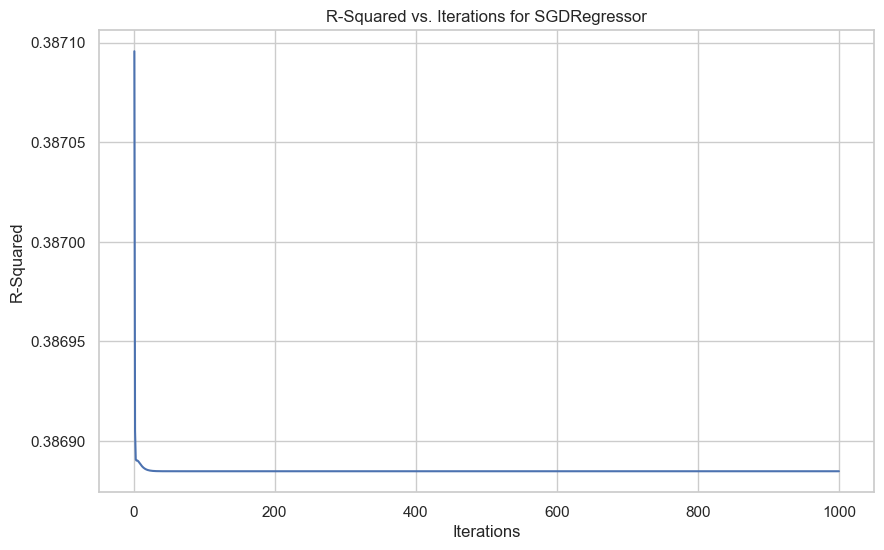

In [130]:
# Plotting MSE vs. Iterations
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=np.arange(1, n_iterations+1), y=rs_per_iteration)
plt.xlabel("Iterations")
plt.ylabel("R-Squared")
plt.title("R-Squared vs. Iterations for SGDRegressor")
plt.show()